# Blackjack

In this notebook, we implement the Blackjack, Example 5.1, from Sutton and Barto's book on Reinforcement Learning. Blackjack, a card game, aims to maximize the sum of card values without exceeding 21, counting face cards as ten and an Ace as 1 or 11. We'll use the first-visit Monte Carlo method to estimate state values under a fixed policy by averaging the returns from the first visits to each state in simulated games.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from blackjack_mc_first_visit_class import Blackjack

## Run Simulation

In [2]:
blackjack = Blackjack()

value_function_10k = blackjack.first_visit_mc(10000)
value_function_500k = blackjack.first_visit_mc(500000)

value_functions = {"10,000": value_function_10k,
                   "500,000": value_function_500k
}

## Plot Value Function

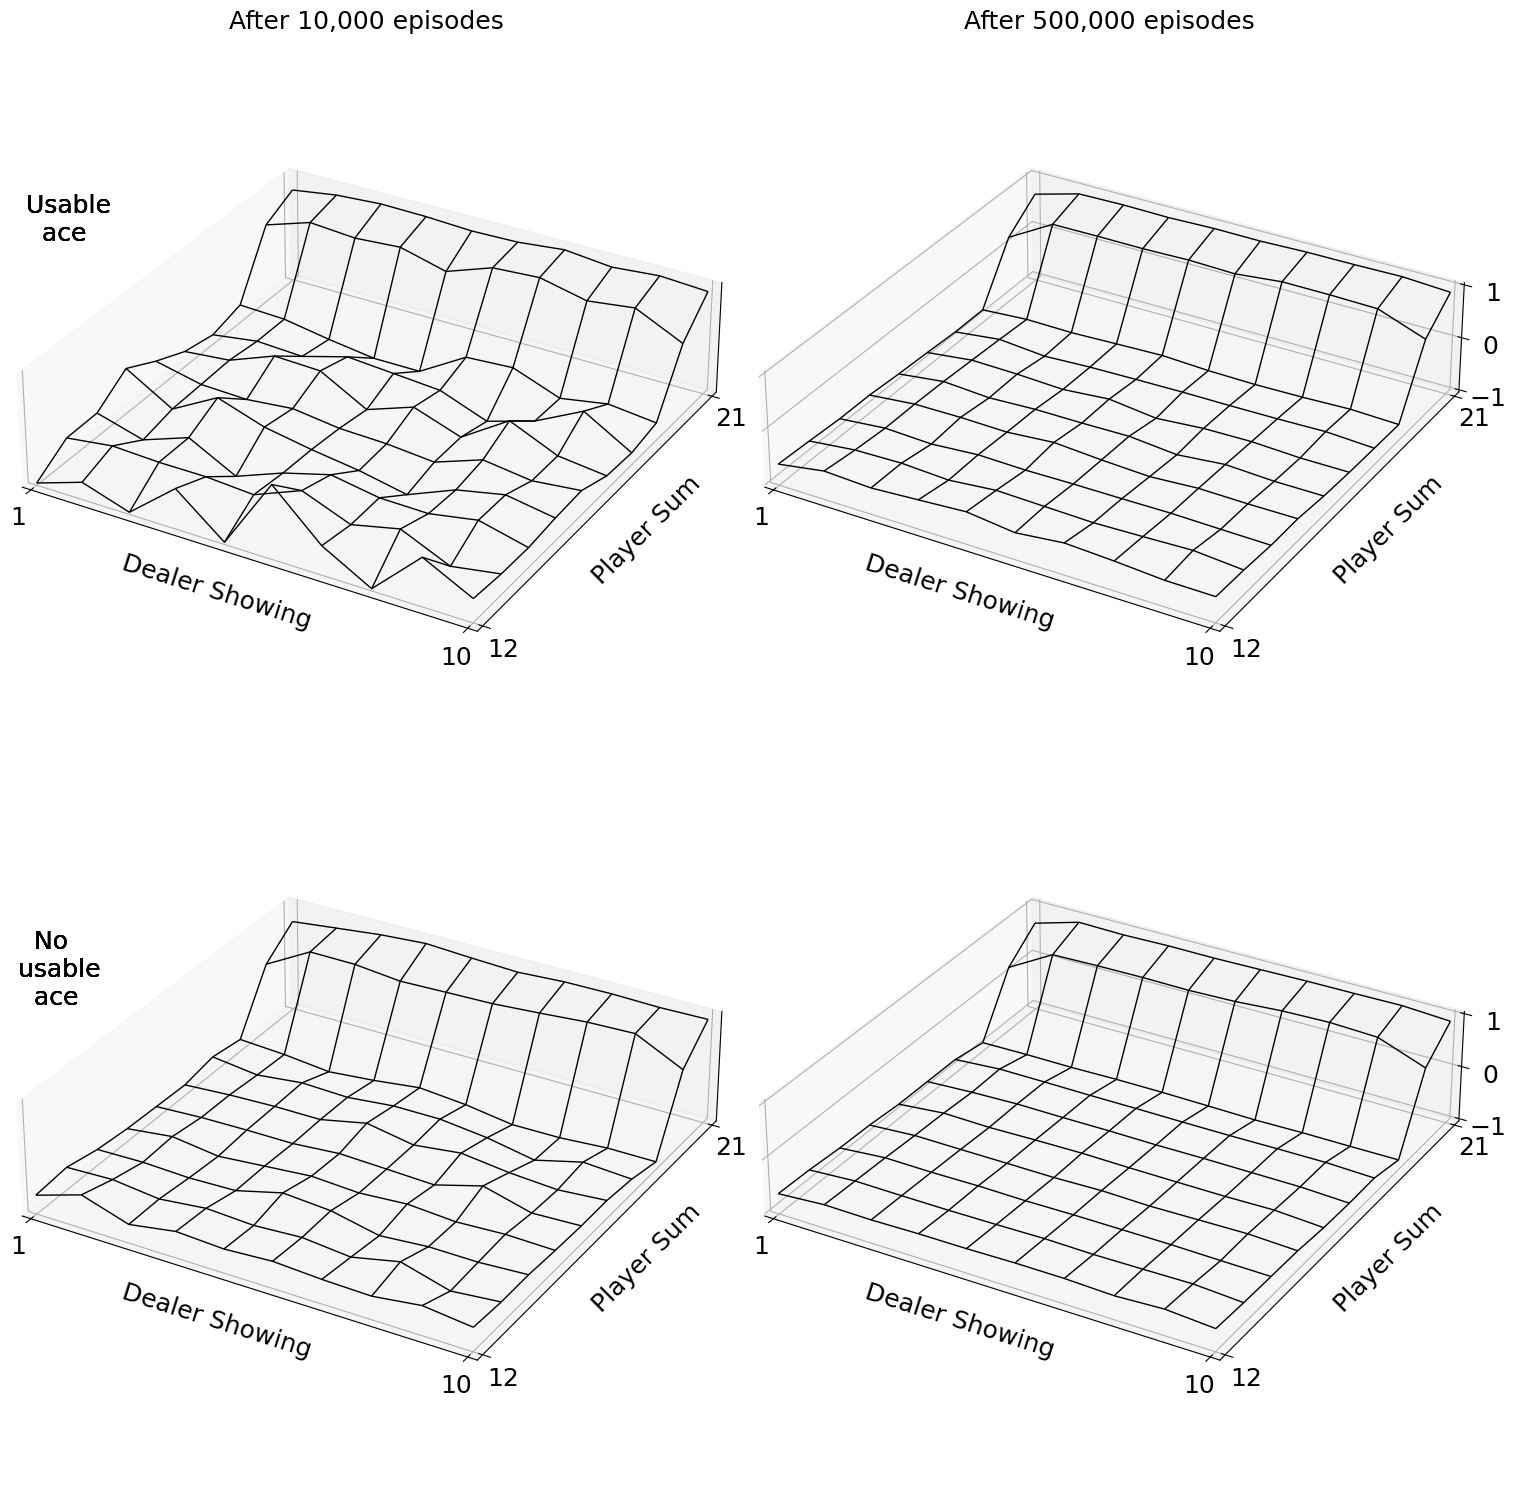

In [3]:
fig = plt.figure(figsize=(15, 15))

for i, usable_ace in enumerate([1, 0]):
    for j, n_episodes in enumerate(["10,000", "500,000"]):
        ax = fig.add_subplot(2, 2, i * 2 + j + 1, projection='3d')
       
        X = np.arange(12, 22, 1)
        Y = np.arange(1, 11, 1)
        X, Y = np.meshgrid(X, Y)
        Z = value_functions[n_episodes][X, Y, usable_ace]

        wireframe = ax.plot_wireframe(Y, X, Z, color='black', linewidth=1)
        
        if not i:
            ax.set_title(f"After {n_episodes} episodes", fontsize=18)
            
        fig.text(0.025, 0.85, 'Usable \n  ace', va='center', rotation='horizontal', fontsize=18)
        fig.text(0.02, 0.35, '  No\nusable \n  ace', va='center', rotation='horizontal', fontsize=18)
        fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0., hspace=0)
        
        ax.set_xlabel('Dealer Showing', fontsize=18)
        ax.set_ylabel('Player Sum', fontsize=18)
        ax.set_xlim([1, 10])
        ax.set_xticks([1, 10])
        ax.set_ylim([12, 21])
        ax.set_yticks([12, 21])
        ax.set_zlim(-1, 1)
        ax.set_zticks([-1, 0, 1] if j else [])
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.set_box_aspect([1, 1 , 0.25])

plt.tight_layout()
plt.show()